# Quality prediction on Wine Dataset

In [1]:
# importing necessary libraries
import time
import random
import pandas as pd
import numpy as np
import collections, numpy
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus
%matplotlib inline

# sklearn libraries we'll be using 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report
from urllib.request import urlopen

import warnings;
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
# importing dataset
wine = pd.read_csv(r"G:\03 - Learnbay\Datasets\QualityPrediction.csv")

wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# checking for missing value in our dataset
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### There are no missing values in our dataset

In [4]:
# checking for dupliacate values in our dataset
wine.duplicated().sum()

240

##### As we can see that there are 240 duplicate values in our dataset.

In [5]:
# viewing the duplicate values
duplicate = wine[wine.duplicated() == True]
duplicate

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [6]:
# removing duplicate values
df = wine.drop_duplicates()

In [7]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
df.duplicated().sum()

0

In [9]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [10]:
# summary statistics for our data
df.describe().style.background_gradient()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
# Checking for unique values in all attribute
df.nunique().sort_values(ascending = True)

quality                   6
free sulfur dioxide      60
alcohol                  65
citric acid              80
pH                       89
residual sugar           91
fixed acidity            96
sulphates                96
volatile acidity        143
total sulfur dioxide    144
chlorides               153
density                 436
dtype: int64

##### The target variable "Quality" has 6 distinct values.

In [12]:
# checking distinct values for 'quality' in ascending order
df.quality.sort_values(ascending = True).unique()

array([3, 4, 5, 6, 7, 8], dtype=int64)

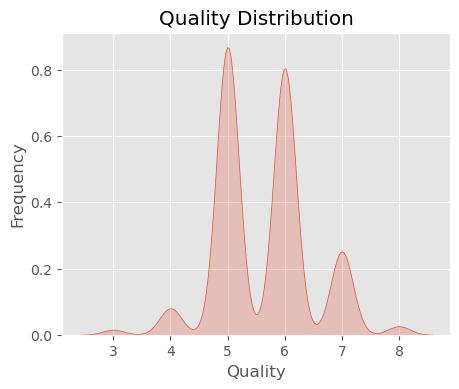

In [13]:
# plotting the quality distribution
plt.figure(figsize = (5,4), dpi = 100)

sns.kdeplot(df.quality, shade = True, palette = 'flare')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Quality Distribution')

plt.show()

##### We have an imbalanced dataset here. Most of the wines have a rating of either 5 or 6.

## Data Visualization

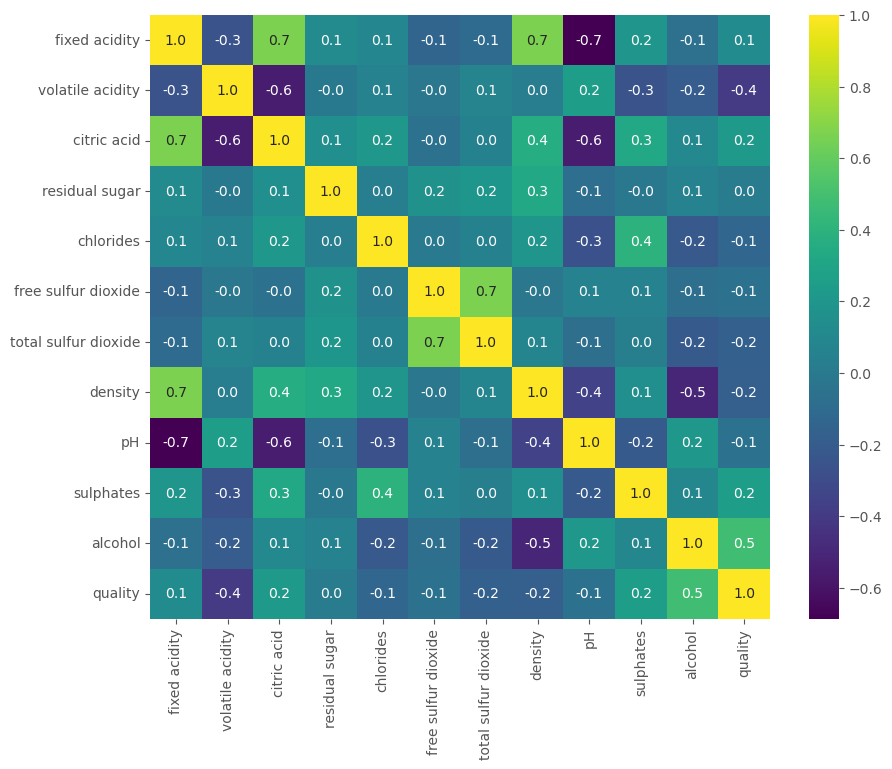

In [14]:
# Correlation
correlation = df.corr()

# constructing a heatmap to understand the correlation between columns
plt.figure(figsize = (10,8), dpi = 100)
sns.heatmap(correlation, fmt ='.1f', annot = True, cmap ='viridis')
plt.show()

In [15]:
features = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

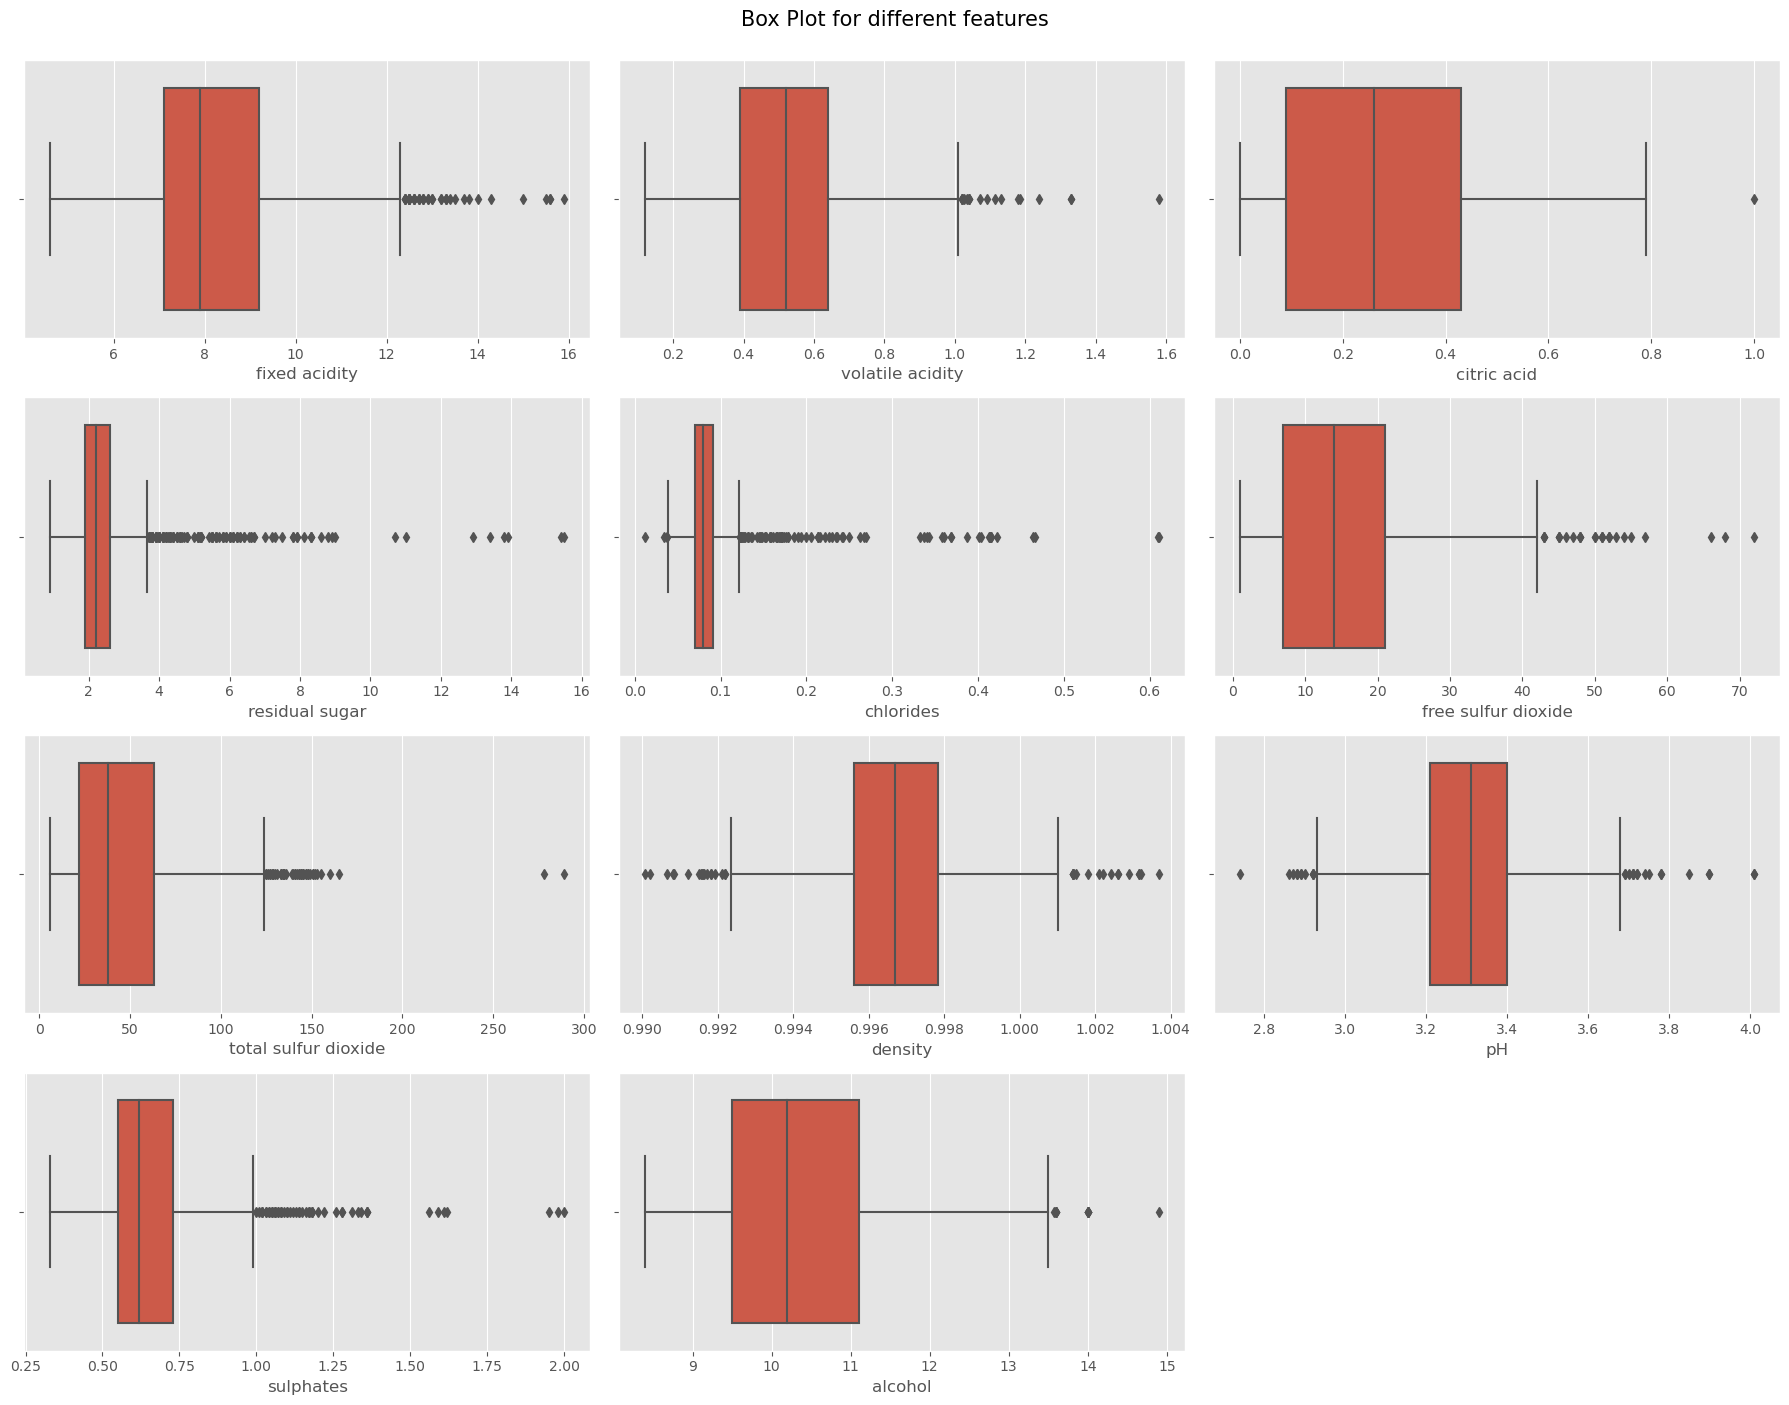

In [16]:
# we can also plot boxplots for each feature.
# with boxplot, we can figure out the median, , minimum, maximum, IQR and outliers

plt.figure(figsize=(18, 14), dpi = 100)
for i, col in enumerate(features):
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data = df, x = col, ax = ax)
plt.suptitle('Box Plot for different features', y = 1.00, fontsize = 15)
plt.tight_layout()

##### As we can see there are plenty of outliers in each feature. We can replace them with median but that might affect the predictive ability of our model. So lets not disturb them.

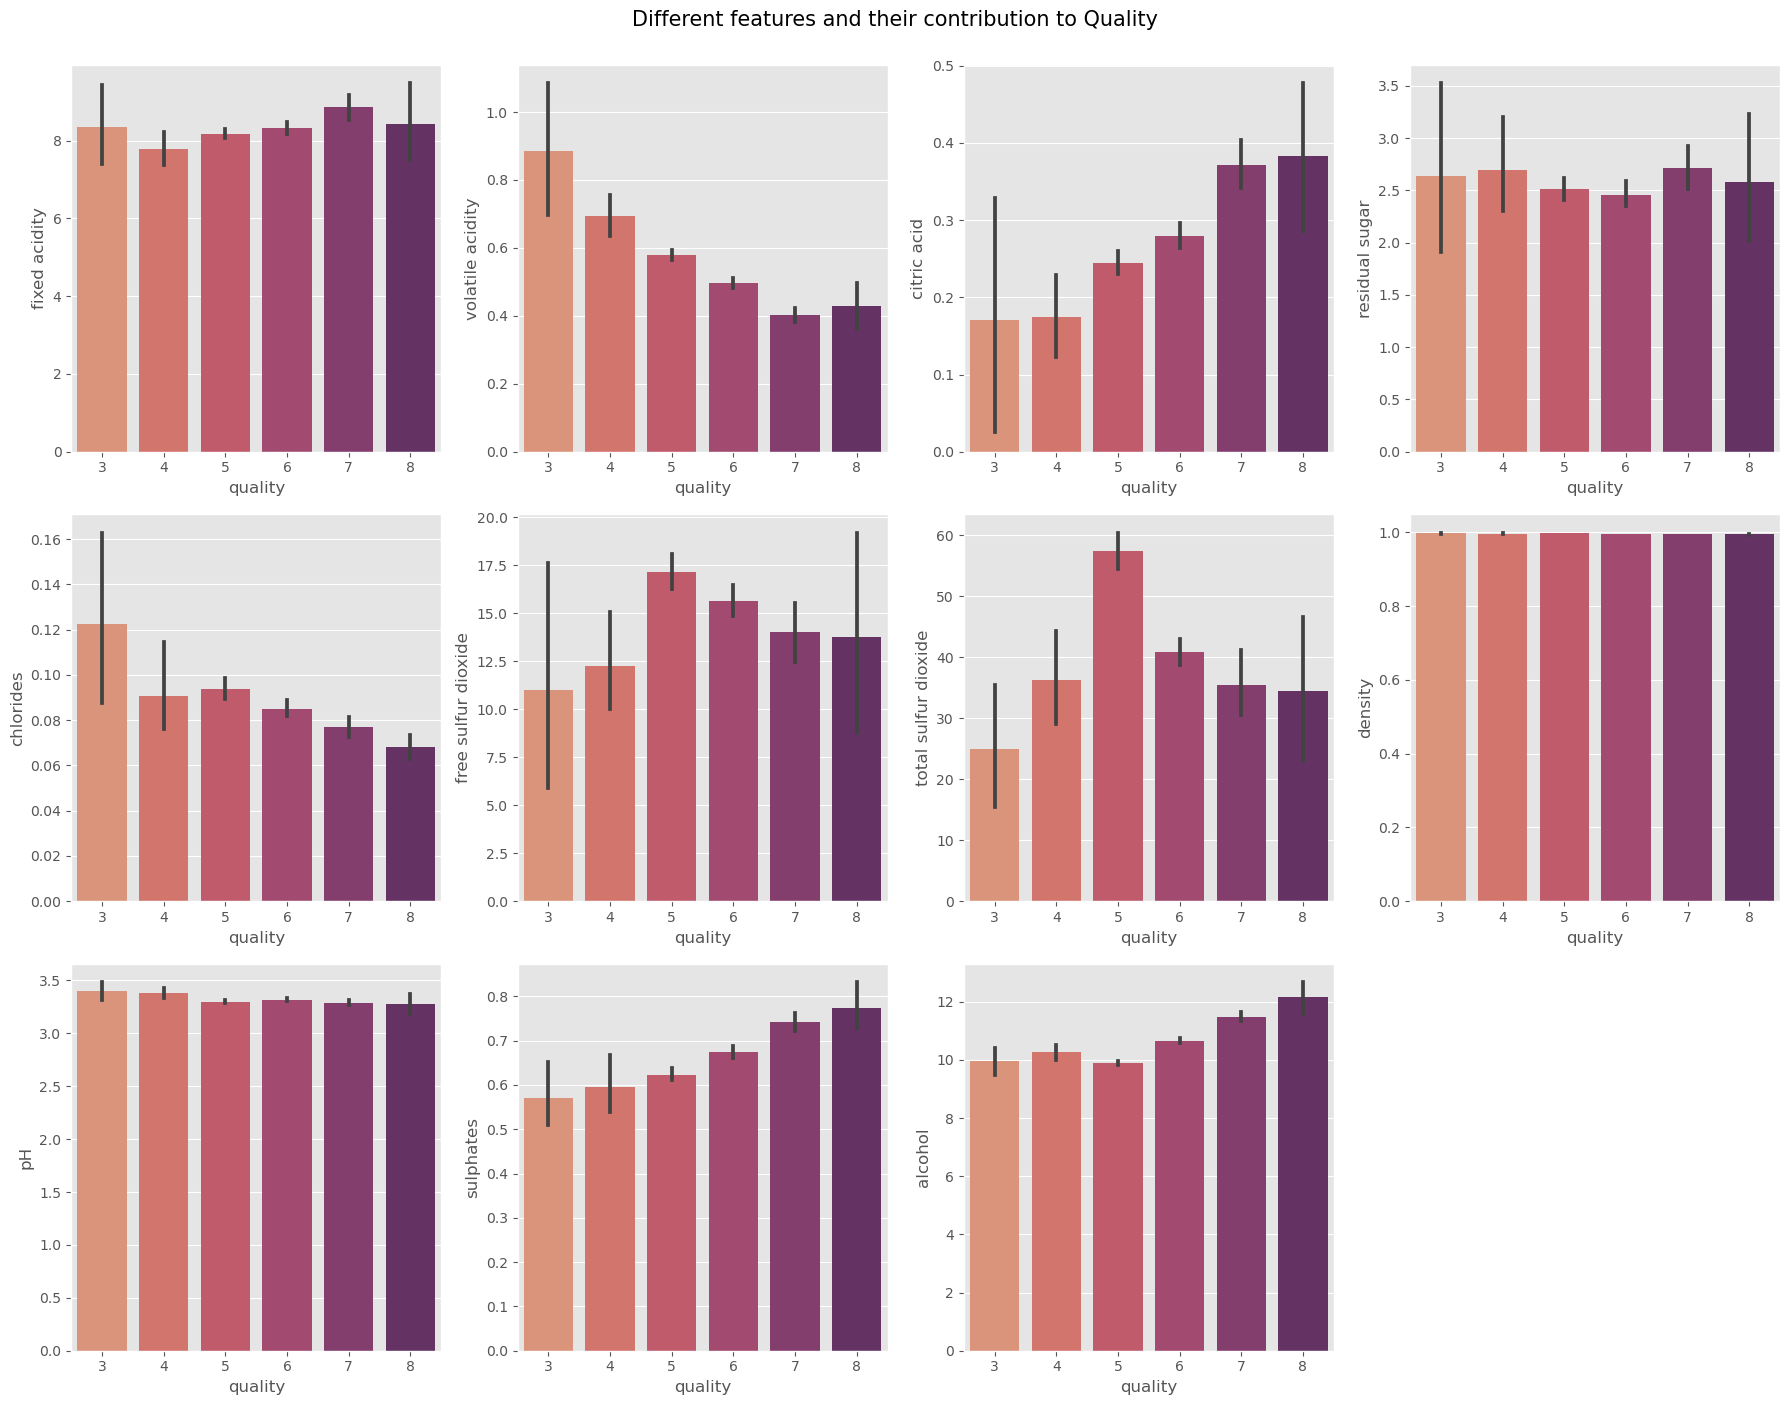

In [17]:
# With barplots we can also find out how these features affects the quality of a wine
plt.figure(figsize=(18, 14), dpi = 100)

for i, col in enumerate(features):
    ax = plt.subplot(3,4, i+1)
    sns.barplot(data = df,x = 'quality', y = col, ax = ax, palette='flare')
plt.suptitle('Different features and their contribution to Quality', y = 1.00, fontsize = 15)
plt.tight_layout()

##### Conclusions :-
1. Volatile acidity and Chlorides are showing a direct negative correlation with the quality.
2. Alcohol, Sulphates and Citric acid are giving a positive correlation with the quality.

* Citric acid is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. It can be added to finished wines to increase acidity and give a “fresh” flavor.

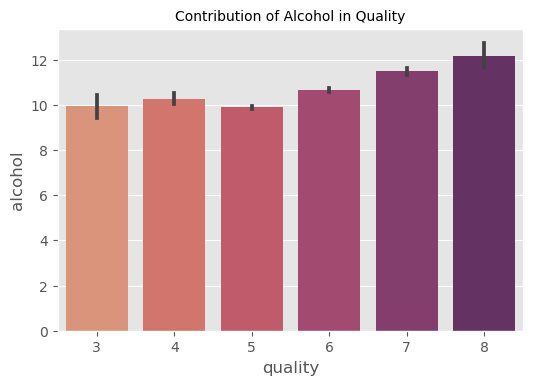

In [18]:
# alcohol and its contribution to the quality
plt.figure(figsize = (6,4), dpi = 100)
sns.barplot(x = 'quality', y = 'alcohol', data = df, palette = 'flare')
plt.title('Contribution of Alcohol in Quality', fontsize = 10)
plt.show()

##### As we can see there is a positive correlation between alcohol and quality. Higher concentration of alcohol leads to better quality.

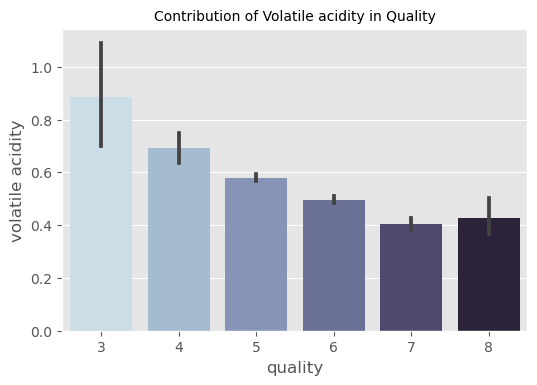

In [19]:
# volatile acidity and its contribution to the quality
plt.figure(figsize = (6,4), dpi = 100)
sns.barplot(x = 'quality', y = 'volatile acidity', data = df, palette = "ch:s=.25,rot=-.25")
plt.title('Contribution of Volatile acidity in Quality', fontsize = 10)
plt.show()

##### Volatile acidity contributes to acidic taste and hence it has a negative correlation with the quality. 

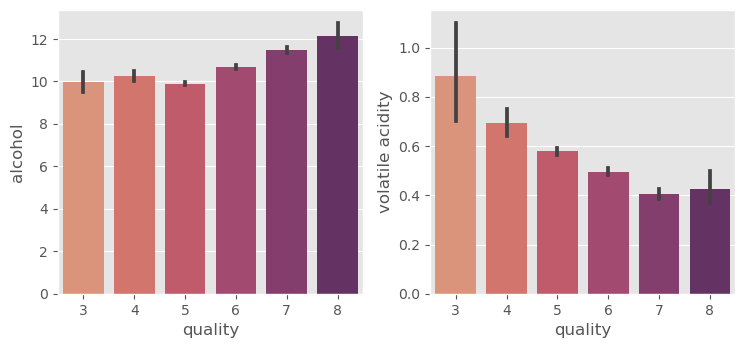

In [20]:
# comparing Alcohol and Volatile acidity w.r.t their contribution towards Quality
alcohol_vs_volatile = df[['alcohol', 'volatile acidity']] 

plt.figure(figsize=(15, 10), dpi = 100)

for i, col in enumerate(alcohol_vs_volatile):
    ax = plt.subplot(3,4, i+1)
    sns.barplot(data = df, x = 'quality', y = col, ax = ax, palette= 'flare')

plt.tight_layout()
plt.show()

3     10
8     17
4     53
7    167
6    535
5    577
Name: quality, dtype: int64



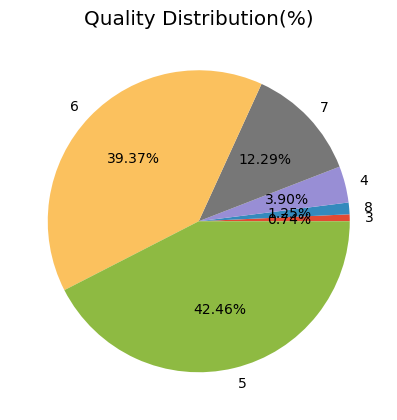

In [21]:
# This will give us the count for each quality score (3 to 8)
quality_score_count = df.quality.value_counts().sort_values(ascending = True)
print(quality_score_count, end = "\n\n")

# plotting a pie chart for the same
plt.figure(figsize = (6,5), dpi = 100)
plt.pie(quality_score_count,autopct = "%.2f%%", labels = quality_score_count.index)
plt.title("Quality Distribution(%)")

plt.show()

<Figure size 700x500 with 0 Axes>

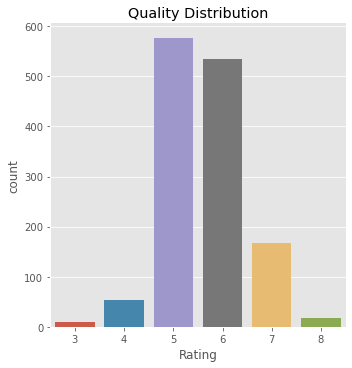

In [22]:
# plotting the same thing with the help of a bar-plot
plt.figure(figsize = (7,5), dpi = 100)
sns.catplot(x = 'quality', data = df, kind = 'count')
plt.title("Quality Distribution")
plt.xlabel('Rating')

plt.show()

##### Findings :-
1. From the above plot, we can conclude that most of the wine being tested have a quality score of 5 out of 10.
2. There are only few  with a score of 8.

# Machine Learning algorithms for predicting quality

## 1. Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn import metrics

##### Data Preprocessing

In [24]:
# assigning features/parameters to X
X = df.drop('quality', axis = 1)

In [25]:
# assigning target value to y
df['best quality'] = [1 if x > 6 else 0 for x in df['quality']]
y = df['best quality']

In [26]:
y.value_counts()

0    1175
1     184
Name: best quality, dtype: int64

In [27]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 3)

# printing shapes y, y_train and y_test
print(y.shape, y_train.shape, y_test.shape)

(1359,) (1087,) (272,)


In [28]:
# standard scaling
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [29]:
# Instantiating and fitting the model to training Dataset
log_reg = LogisticRegression(random_state = 50)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=50)

In [30]:
# prediction for test dataset
y_pred_lr = log_reg.predict(X_test)

In [31]:
# Actual
print(f"Actual :- \n{y_test.value_counts()}", end = "\n\n")

# Predicted
print(f"Predicted :- \n{collections.Counter(y_pred_lr)}")

Actual :- 
0    237
1     35
Name: best quality, dtype: int64

Predicted :- 
Counter({0: 254, 1: 18})


#### * 1 represents those having high quality (>  6)
#### * 0 represents those having low quality (< 6)

##### Confusion Matrix

In [32]:
# defining a function to plot confusion matrix

def create_conf_mat(y_test, model_predictions):
    
    """Function returns confusion matrix comparing two arrays"""
    
    if (len(y_test.shape) != len(model_predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    
    elif (y_test.shape != model_predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
   
    else:
        
        # Confusion Matrix
        conf_matrix = confusion_matrix(y_test, model_predictions)
        print(conf_matrix, '\n\n')

        plt.figure(figsize = (5,4), dpi = 100)
        sns.heatmap(conf_matrix, annot = True)
        plt.title('Confusion Matrix', fontsize = 10)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        
        
        '''Another way of plotting confusion matrix. 
           Copy the below line and replace it with the code in the else block'''
        
        # test_crosstb_comp = pd.crosstab(index = y_test, columns = model_predictions)
        # print(test_crosstb_comp, '\n\n')
        
        # test_crosstb = test_crosstb_comp.values
        # print(test_crosstb)

[[229   8]
 [ 25  10]] 




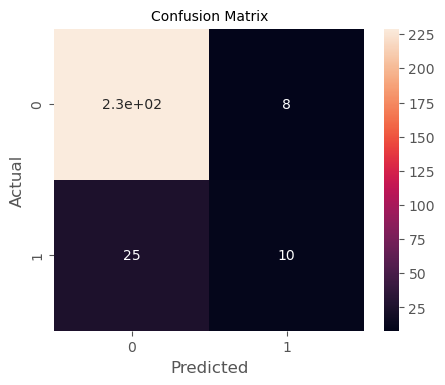

In [33]:
create_conf_mat(y_test, y_pred_lr)

##### Explanation :

* 229 is True Negative. (we have correctly predicted 0)
* 10 is True Positive. (we have correctly predicted 1)


* 8 is False Positive. (we have incorreclty predicted 1 whereas actual was 0)
* 25 is False Negative. (we have incorrectly predicted 0 whereas actual was 1)

#### For accuracy of our test we can calculate :
(True Positive + True Negative)/ total no.

In [34]:
accuracy_rate = 100*(10 + 229)/len(y_test)
print(f"Accuracy rate : {'%.2f' %accuracy_rate} %")

Accuracy rate : 87.87 %


#### For mis-classification rate we can calculate :
(False Positive + False Negative)/ total no. 

In [35]:
misclassification_rate = 100*(8 + 25)/len(y_test)
print(f"Misclassification rate : {'%.2f' %misclassification_rate} %")

Misclassification rate : 12.13 %


#### We can also use in-built functions for Accuracy rate, Precision rate, Recall rate.

In [36]:
print("Accuracy : ", '%.2f' %metrics.accuracy_score(y_test, y_pred_lr))
print("Misclassification :", '%.2f' % (1 - metrics.accuracy_score(y_test, y_pred_lr)))
print("Precision : ", '%.2f' %metrics.precision_score(y_test, y_pred_lr))
print("Recall : ", '%.2f' %metrics.recall_score(y_test, y_pred_lr))
print("f1 Score :", '%.2f' %metrics.f1_score(y_test, y_pred_lr))

Accuracy :  0.88
Misclassification : 0.12
Precision :  0.56
Recall :  0.29
f1 Score : 0.38


##### ROC curve and Area Under Curve (AUC)

In [37]:
# defining a function to plot ROC curve
def create_roc_curve(model, y_test, y_pred):
    
    # for predicting probablities
    y_pred_proba = model.predict_proba(X_test)[::,1]
    
    # roc function
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    # to get auc score
    auc_score = metrics.roc_auc_score(y_test, y_pred_proba)
    
    # plotting
    plt.figure(figsize = (6,5), dpi = 100)
    lw = 2
    plt.plot(fpr, tpr, label = "AUC = %.2f" %auc_score, color = 'orange', lw = lw)
    plt.plot([0,1], [0,1], color = 'blue', linestyle = '--', lw = lw)

    # labelling
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.title("Receiver Operating Characteristic Curve (ROC)", fontsize = 10)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc = 'lower right')

    plt.show()

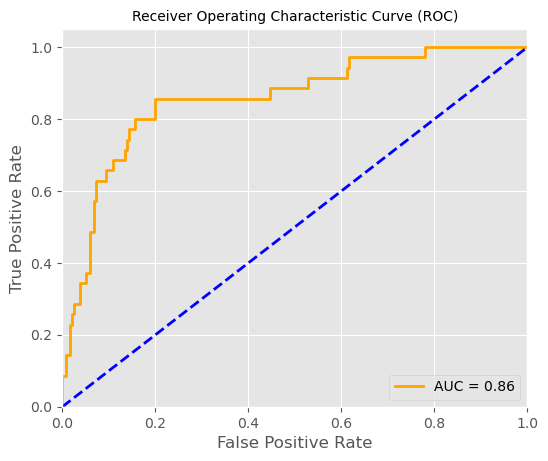

In [38]:
# calling the func    
create_roc_curve(log_reg, y_test, y_pred_lr)

In [39]:
# classification report
classification_report_lr = classification_report(y_test, y_pred_lr)
print(f'Classification Report (Logistic Regression) :- \n\n{classification_report_lr}')

Classification Report (Logistic Regression) :- 

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       237
           1       0.56      0.29      0.38        35

    accuracy                           0.88       272
   macro avg       0.73      0.63      0.66       272
weighted avg       0.86      0.88      0.86       272



## 2. KNN Model

In [40]:
# importing package
from sklearn.neighbors import KNeighborsClassifier

In [41]:
# Choosing best K-value by using elbow method 
accuracy_rate = []

# constructing  a loop for trying i numbers
for i in range(1,40): 
    
    knn_testing = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn_testing, X, y, cv = 10, scoring = 'accuracy')
    accuracy_rate.append(score.mean())

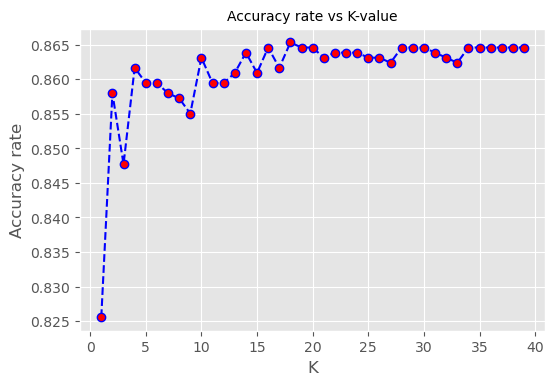

In [42]:
# we can plot accuracy rate w.r.t. different k-values
plt.figure(figsize = (6,4), dpi = 100)
plt.plot(range(1,40), accuracy_rate, color = 'b', linestyle = '--', marker = 'o',
                                     markerfacecolor = 'r', markersize = 6)
plt.xlabel('K')
plt.ylabel('Accuracy rate')
plt.title('Accuracy rate vs K-value' , fontsize = 10)
plt.show()

##### The accuracy is consistent when K-value is around 22.

In [43]:
# instantiating
knn = KNeighborsClassifier(n_neighbors = 22)

knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

##### Confusion Matrix

[[233   4]
 [ 27   8]] 




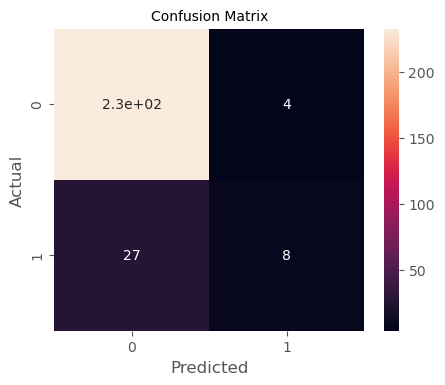

In [44]:
# calling func
create_conf_mat(y_test, y_pred_knn)

##### ROC curve and Area Under Curve (AUC)

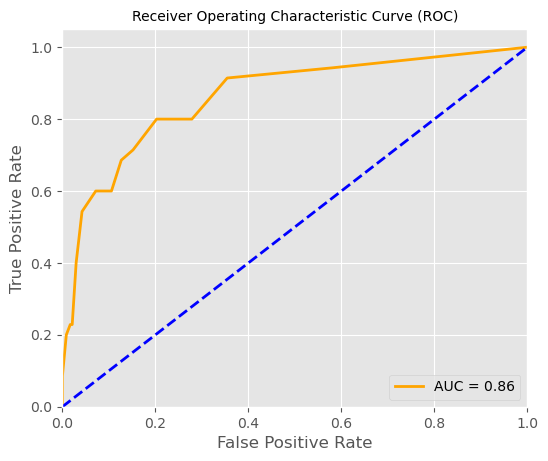

In [45]:
# calling func
create_roc_curve(knn, y_test, y_pred_knn)

In [46]:
classification_report_knn = classification_report(y_test, y_pred_knn)
print(f'Classification Report (KNN) :- \n\n{classification_report_knn}')

Classification Report (KNN) :- 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       237
           1       0.67      0.23      0.34        35

    accuracy                           0.89       272
   macro avg       0.78      0.61      0.64       272
weighted avg       0.87      0.89      0.86       272



## 3. Decision Tree

In [47]:
# sklearn libraries we'll be using 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

#### Decision Tree with depth 2 and criterion = 'gini'

In [48]:
# Instantiating and fitting the model to training Dataset
decision_tree_d2 = DecisionTreeClassifier(random_state = 1, max_depth = 2)

# fitting
decision_tree_d2.fit(X_train, y_train)

# checking the training score
decision_tree_d2_train_score = (decision_tree_d2.score(X_train, y_train))*100

# checking the testing score
decision_tree_d2_test_score = (decision_tree_d2.score(X_test, y_test))*100

print('Training Score :', '%.2f' %decision_tree_d2_train_score, '%')
print('Testing Score: ', '%.2f' %decision_tree_d2_test_score, '%')

Training Score : 88.87 %
Testing Score:  88.97 %


#### Decision Tree with depth 4

In [49]:
# Instantiating and fitting the model to training Dataset
decision_tree_d4 = DecisionTreeClassifier(random_state = 1, max_depth = 4)

# fitting
decision_tree_d4.fit(X_train, y_train)

# checking the training score
decision_tree_d4_train_score = (decision_tree_d4.score(X_train, y_train))*100

# checking the testing score
decision_tree_d4_test_score = (decision_tree_d4.score(X_test, y_test))*100

print('Training Score :', '%.2f' %decision_tree_d4_train_score, '%')
print('Testing Score: ', '%.2f' %decision_tree_d4_test_score, '%')

Training Score : 91.08 %
Testing Score:  88.24 %


#### Decision Tree with depth 6

In [50]:
# Instantiating and fitting the model to training Dataset
decision_tree_d6 = DecisionTreeClassifier(random_state = 1, max_depth = 6)

# fitting
decision_tree_d6.fit(X_train, y_train)

# checking the training score
decision_tree_d6_train_score = (decision_tree_d6.score(X_train, y_train))*100

# checking the testing score
decision_tree_d6_test_score = (decision_tree_d6.score(X_test, y_test))*100

print('Training Score :', '%.2f' %decision_tree_d6_train_score, '%')
print('Testing Score: ', '%.2f' %decision_tree_d6_test_score, '%')

Training Score : 94.94 %
Testing Score:  89.34 %


#### Decision Tree with depth 8

In [51]:
# Instantiating and fitting the model to training Dataset
decision_tree_d8 = DecisionTreeClassifier(random_state = 1, max_depth = 8)

# fitting
decision_tree_d8.fit(X_train, y_train)

# checking the training score
decision_tree_d8_train_score = (decision_tree_d8.score(X_train, y_train))*100

# checking the testing score
decision_tree_d8_test_score = (decision_tree_d8.score(X_test, y_test))*100

print('Training Score :', '%.2f' %decision_tree_d8_train_score, '%')
print('Testing Score: ', '%.2f' %decision_tree_d8_test_score, '%')

Training Score : 97.52 %
Testing Score:  86.76 %


#### Decision Tree with depth 2 and criterion = 'entropy'

In [52]:
# Instantiating and fitting the model to training Dataset
decision_tree_entropy = DecisionTreeClassifier(max_depth = 2, criterion = 'entropy')

# fitting
decision_tree_entropy.fit(X_train, y_train)

y_pred_dt = decision_tree_entropy.predict_proba(X_test)[:,1]

# checking the training score
decision_tree_entropy_train_score = (decision_tree_entropy.score(X_train, y_train))*100
print('Training Score :', '%.2f' %decision_tree_entropy_train_score, '%')

# checking the testing score
decision_tree_entropy_test_score = (decision_tree_entropy.score(X_test, y_test))*100
print('Testing Score :','%.2f' %decision_tree_entropy_test_score, '%')

Training Score : 86.66 %
Testing Score : 86.03 %


##### Conclusion :

So far, Decision Tree with depth 6 and criterion being 'gini' has given the best accuracy rate.

## Graphical Representation of Tree

In [53]:
from io import StringIO

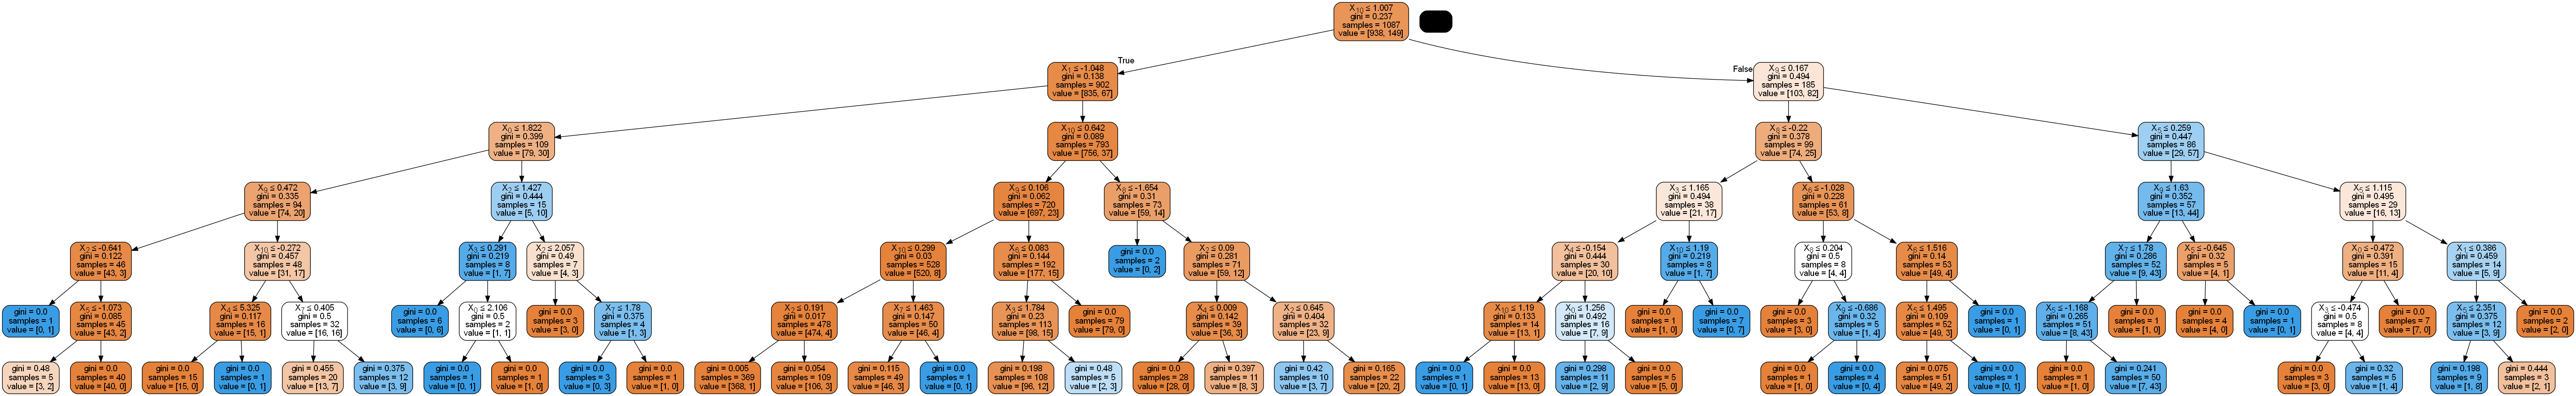

<Figure size 800x800 with 0 Axes>

In [54]:
plt.figure(figsize = (8,8), dpi = 100)

dot_data = StringIO()

export_graphviz(decision_tree_d6, out_file = dot_data,
               filled = True, rounded = True,
               special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [55]:
# prediction for test dataset
y_pred_dt = decision_tree_d6.predict(X_test)

# testing score
print('Test Score : ','%.2f' %decision_tree_d6.score(X_test, y_test))

Test Score :  0.89


##### Confusion Matrix

[[229   8]
 [ 21  14]] 




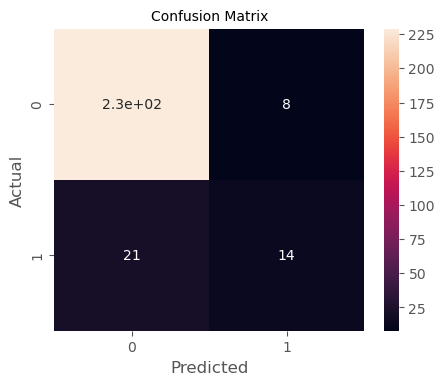

In [56]:
# calling func
create_conf_mat(y_test, y_pred_dt)

##### ROC curve and Area Under Curve (AUC)

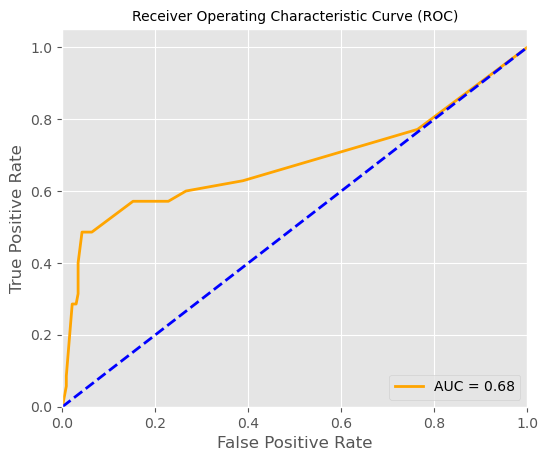

In [57]:
# calling func
create_roc_curve(decision_tree_d6, y_test, y_pred_dt)

##### Classification report

In [58]:
classification_report_dt = classification_report(y_test, y_pred_dt)
print(f'Classification Report (Decision Tree) :- \n\n{classification_report_knn}')

Classification Report (Decision Tree) :- 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       237
           1       0.67      0.23      0.34        35

    accuracy                           0.89       272
   macro avg       0.78      0.61      0.64       272
weighted avg       0.87      0.89      0.86       272



## 4. Naive Bayes Model

In [59]:
# importing pockage
from sklearn.naive_bayes import BernoulliNB

In [60]:
# instantiating
model_nb = BernoulliNB()
model_nb.fit(X_train, y_train)

# predictions
y_pred_nb = model_nb.predict(X_test)

##### Confusion Matrix

[[216  21]
 [ 15  20]] 




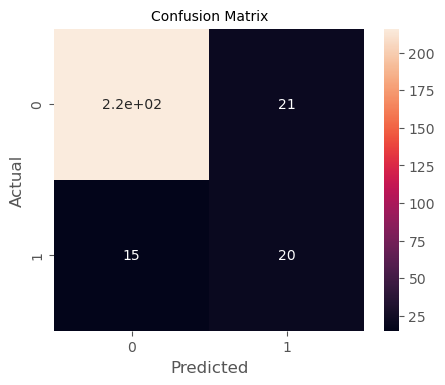

In [61]:
# calling func
create_conf_mat(y_test, y_pred_nb)

##### ROC curve and Area Under Curve (AUC)

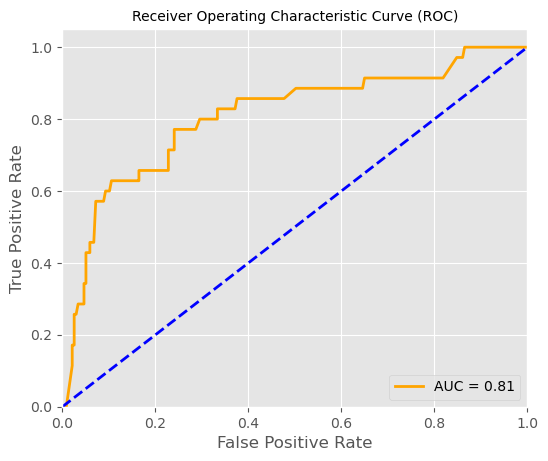

In [62]:
# calling func
create_roc_curve(model_nb, y_test, y_pred_nb)

##### Classification report

In [63]:
classification_report_nb = classification_report(y_test, y_pred_nb)
print(f'Classification Report (Naive Bayes) :- \n\n{classification_report_nb}')

Classification Report (Naive Bayes) :- 

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       237
           1       0.49      0.57      0.53        35

    accuracy                           0.87       272
   macro avg       0.71      0.74      0.72       272
weighted avg       0.88      0.87      0.87       272



## 5. Random Forest

In [64]:
rf = RandomForestClassifier(random_state = 40)

##### Hyper Parameter Optimization using GridSearchCV

In [65]:
# setting a seed
np.random.seed(40)

# this will record the time
start = time.time()

# gridsearch will use each parameter for prediction
param_distribution = {'max_depth':[2,3,4,5],
                     'bootstrap':[True,False],
                     'max_features':['auto','sqrt','log2', None],
                     'criterion':['gini','entropy']}

# using gridsearch to find the best possible combination out of param_distrbution
model_rf = GridSearchCV(rf, cv = 10, param_grid = param_distribution, n_jobs = 3)
model_rf.fit(X_train, y_train)

print('Best Parameters using Grid search :- \n', model_rf.best_params_)
end = time.time()
print('Time taken in grid search :- %0.2f'%(end-start))

Best Parameters using Grid search :- 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': None}
Time taken in grid search :- 52.89


In [66]:
rf.set_params(criterion = 'gini', max_features = None, max_depth = 2)

RandomForestClassifier(max_depth=2, max_features=None, random_state=40)

##### Actual Vs Predictions

In [67]:
# flatten y_test
y_test_actual = y_test.values.ravel()

In [68]:
# instantiaitng
rf.fit(X_train, y_train)

# predicting
y_pred_rf = rf.predict(X_test)

In [69]:
print(f" Actual : \n\n{y_test_actual}", end ="\n\n")
print(f" Predicted : \n\n {y_pred_rf}")

 Actual : 

[0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]

 Predicted : 

 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

##### Confusion Matrix

[[231   6]
 [ 25  10]] 




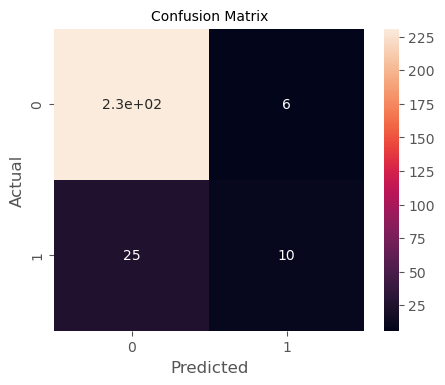

In [70]:
create_conf_mat(y_test, y_pred_rf)

In [71]:
# accuracy rate
model_accuracy = (rf.score(X_test, y_test))*100
print("Accuracy of our model is %0.2f" %model_accuracy, '%')

Accuracy of our model is 88.60 %


In [72]:
# error rate
model_error = 100 - model_accuracy
print("Error rate of our model is %.2f" %model_error, '%')

Error rate of our model is 11.40 %


##### ROC curve and Area Under Curve (AUC)

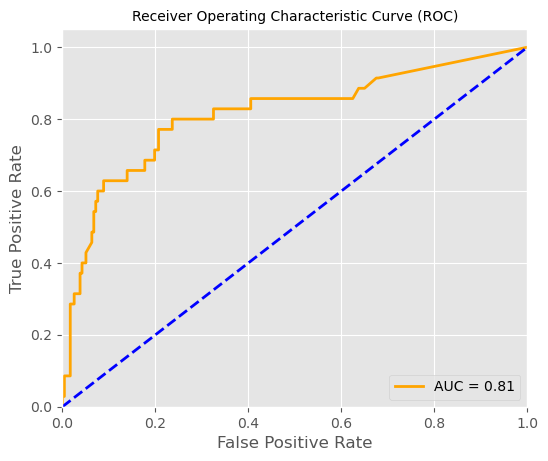

In [73]:
create_roc_curve(rf, y_test, y_pred_rf)

##### Classification Report

In [74]:
classification_report_rf = classification_report(y_test, y_pred_rf)
print(f'Classification Report (Random Forest) :- \n\n{classification_report_rf}')

Classification Report (Random Forest) :- 

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       237
           1       0.62      0.29      0.39        35

    accuracy                           0.89       272
   macro avg       0.76      0.63      0.66       272
weighted avg       0.87      0.89      0.87       272

